#### Basic of cluster analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [71]:
data = pd.read_csv('data/Country-clusters.csv')
data[:2]

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English


##### plot the data

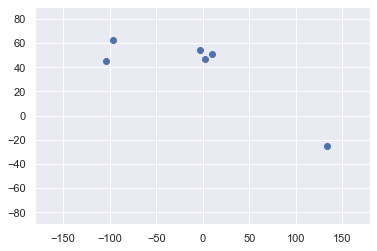

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Select the features

In [6]:
x = data.iloc[:,1:3] # [rows,columns]
x[:3]

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40


#### Clustering

In [15]:
kmeans = KMeans(3)  # 2 => no. of clusters

In [16]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### Clustering results

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [18]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


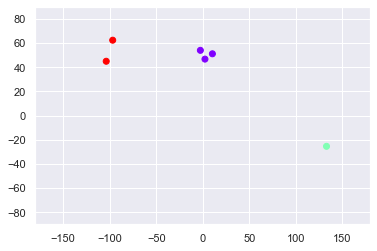

In [19]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Map the data

In [89]:
data_mapped = data.copy()
data_mapped['Language']= data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [34]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [35]:
kmeans= KMeans(3).fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [36]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


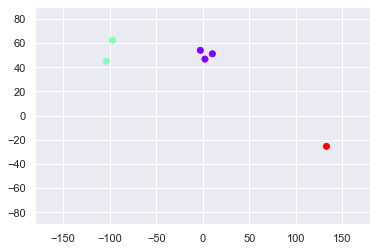

In [37]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Selecting the number of clusters

In [38]:
#WCSS => within-cluster sum of squares
kmeans.inertia_

290.10523333333333

In [39]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [40]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

#### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

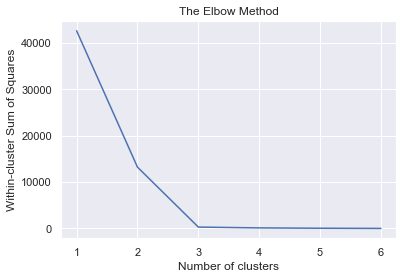

In [42]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### Market Segmentation with Cluster Analysis

In [43]:
data = pd.read_csv('data/Example.csv')
data[:3]

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99


Text(0, 0.5, 'Loyalty')

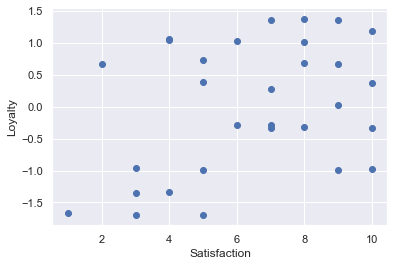

In [46]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [47]:
x = data.copy()
kmeans = KMeans(2).fit(x)

#### Clustering results

In [48]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

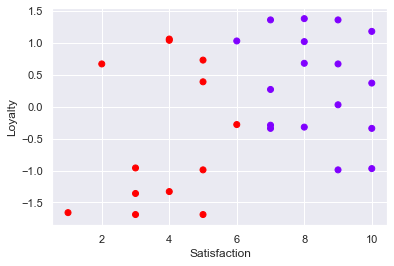

In [49]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


> Most probably the algorithm only considered satisfaction as a features as it has a higher value than Loyalty

#### Standardize the variables
* If the variable has equal importance like other variables
* In our case here, standardizing the Satisfaction gives both the Loyalty & Satisfaction gets equal importance from the clustering algorithm

In [54]:
from sklearn import preprocessing
x_scaled = preprocessing(x)
x_scaled

TypeError: 'module' object is not callable

In [56]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled[:2]

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124]])

#### Taking advantage of the Elbow method

In [57]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.363006425346784,
 4.337110750237059,
 3.7853513108384]

Text(0, 0.5, 'Within-cluster Sum of Squares')

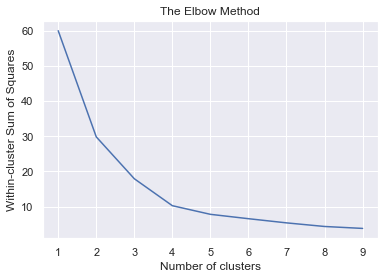

In [58]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### Explore clustering solutions and select the number of clusters

In [61]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred']= kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

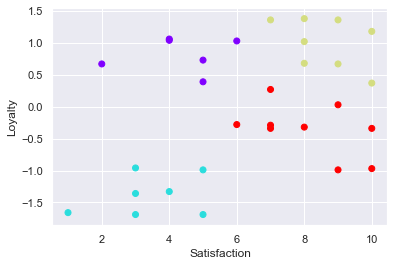

In [64]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


#### Heatmaps and dendrograms

In [105]:
data = pd.read_csv('data/Country-clusters-standardized.csv',index_col='Country')
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [91]:
#data_mapped =data_mapped.reindex(index=data_mapped['Country'])
#data_mapped.set_index("Country",inplace=True)


In [106]:
 x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'],axis=1)

In [107]:

x_scaled 

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


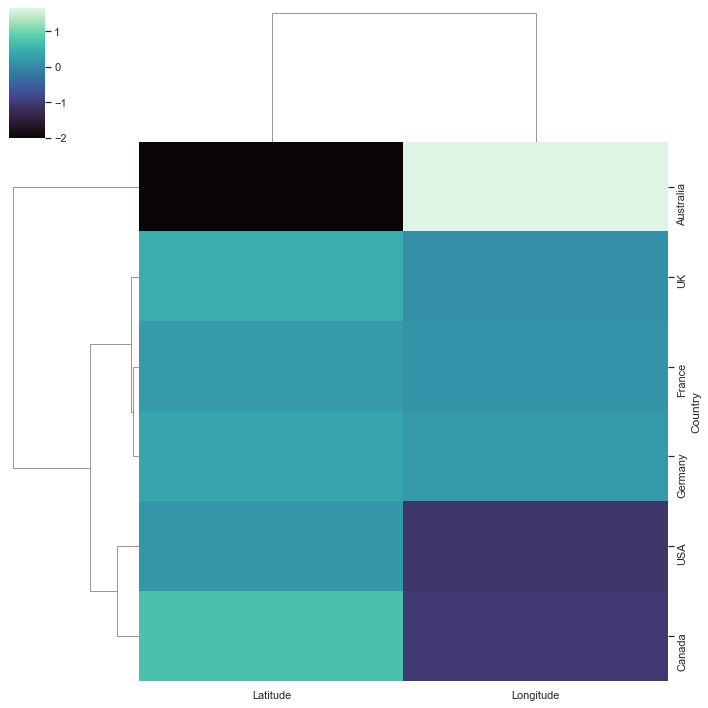

In [109]:
sns.clustermap(x_scaled, cmap='mako')